<a href="https://colab.research.google.com/github/GarnetsAleksandr/pet_projects/blob/main/Linkedin/Linkedin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дашборд
https://public.tableau.com/app/profile/gar5891/viz/Linkedin_16859804785410/Linkedin?publish=yes

# Импорт библиотек

In [ ]:
import pandas as pd
# pd.set_option('display.max_colwidth', None)
from bs4 import BeautifulSoup
import numpy as np
from datetime import datetime, timedelta

In [ ]:
from IPython.display import display, HTML

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Парсинг CSV

In [ ]:
raw_df=pd.read_csv('/content/drive/MyDrive/Linkedin- Мастерская/masterskaya_parsing_LinkedIn_2023_05_23.csv', index_col=0)

In [ ]:
df=pd.DataFrame(columns=['vacancy_name', 'city_region_country','type_of_employment','company','field_of_activity','company_size','hard_skills','publication','candidates'])

In [ ]:
for i in range(raw_df.shape[0]):
  lis=[]
  soup = BeautifulSoup(raw_df['html'][i], 'lxml')

  # наименование вакансии
  try:
    lis.append(soup.h2.text.strip())
  except:
   lis.append('No_info')

# город, регион, страна
  try:
     lis.append(soup.find('span', attrs= {'class':'jobs-unified-top-card__bullet'} ).text.strip().split(','))
  except:
     lis.append(np.NaN)

# тип занятости (online, hybride, on-site)
  try:
     lis.append(soup.find('span', attrs= {'class':'jobs-unified-top-card__workplace-type'} ).text.strip())
  except:
    lis.append('No_info')

# компания
  try:
     lis.append(soup.find('span', attrs= {'class':'jobs-unified-top-card__company-name'} ).text.strip())
  except:
     lis.append('No_info')

# сфера деятельности компании
  try:
   company_info = soup.find('div', {'class': 't-14 mt5'})
   industry = company_info.text.split('\n')[1].strip()
   lis.append(industry)
  except:
     lis.append('No_info')

# размер компании (количество работников)
  try:
    lis.append(soup.find('span', attrs= {'jobs-company__inline-information'} ).text.strip().split(' ')[0])
  except:
     lis.append('No_info')

# требуемые хард скилы
  try:
     lis.append(soup.find('div', attrs= {'class':"jobs-description__content jobs-description-content"} ).text.strip())
  except:
    lis.append('No_info')

# дата публикации вакансии
  try:
     lis.append(soup.find('span', attrs= {'jobs-unified-top-card__posted-date'} ).text.strip())
  except:
     lis.append('No_info')

#количество кандидатов на вакансию
  try:
     lis.append(soup.find('span', attrs= {'jobs-unified-top-card__applicant-count'} ).text.strip().split(' ')[0])
  except:
    lis.append(0)

  df.loc[len(df.index)] =lis

In [ ]:
df.head()

,vacancy_name,city_region_country,type_of_employment,company,field_of_activity,company_size,hard_skills,publication,candidates
0,Data Analyst,"[Basel, Basel, Switzerland]",On-site,PharmiWeb.Jobs: Global Life Science Jobs,Staffing & Recruiting,11-50,About the job\n \n\n \n ...,1 week ago,47
1,Data Analyst - Logistics,"[Coventry, England, United Kingdom]",On-site,Resolute Recruitment,No_info,No_info,About the job,1 week ago,0
2,Data Analyst - Logistics,"[Coventry, England, United Kingdom]",On-site,Resolute Recruitment,No_info,No_info,About the job\n \n\n \nData Analyst - L...,1 week ago,0
3,Data Analyst (Space & Planning),"[South Molton, England, United Kingdom]",On-site,Mole Valley Farmers,No_info,No_info,About the job\n \n\n \nSalary: To be di...,1 week ago,0
4,Data Analyst,"[Lugano, Ticino, Switzerland]",On-site,FORFIRM,No_info,No_info,About the job\n \n\n \nFORFIRM is provi...,2 weeks ago,0


# Предобработка данных

In [ ]:
skills = (['datahub', 'api', 'github', 'google analytics', 'adobe analytics', 'ibm coremetrics', 'omniture'
            'gitlab', 'erwin', 'hadoop', 'spark', 'hive'
           'databricks', 'aws', 'gcp', 'azure','excel',
            'redshift', 'bigquery', 'snowflake',  'hana'
            'grafana', 'kantar', 'spss', 'a/b testing', 'ab testing',
           'asana', 'basecamp', 'jira', 'dbeaver','trello', 'miro', 'salesforce',
           'rapidminer', 'thoughtspot',  'power point',  'docker', 'jenkins','integrate.io', 'talend', 'apache nifi','aws glue','pentaho','google data flow',
             'azure data factory','xplenty','skyvia','iri voracity','xtract.io','dataddo', 'ssis',
             'hevo data','informatica','oracle data integrator','k2view','cdata sync','querysurge',
             'rivery', 'dbconvert', 'alooma', 'stitch', 'fivetran', 'matillion','streamsets','blendo',
             'iri voracity','logstash', 'etleap', 'singer', 'apache camel','actian', 'airflow', 'luidgi', 'datastage',
           'python', 'vba', 'scala', ' r ', 'java script', 'julia', 'sql', 'matlab', 'java', 'html', 'c++', 'sas',
           'data studio', 'tableau', 'looker', 'powerbi', 'cognos', 'microstrategy', 'spotfire',
             'sap business objects','microsoft sql server', 'oracle business intelligence', 'yellowfin',
             'webfocus','sas visual analytics', 'targit', 'izenda',  'sisense', 'statsbot', 'panorama', 'inetsoft',
             'birst', 'domo', 'metabase', 'redash', 'power bi', 'alteryx', 'dataiku', 'qlik sense', 'qlikview'
          ])

In [ ]:
def city (df):
  if len(df['city_region_country'])==3:
    return df['city_region_country'][0]
  else:
     return 'No_info'

In [ ]:
df['city']=df.apply(city, axis=1)

In [ ]:
def country (df):
  if len(df['city_region_country'])==3:
    return df['city_region_country'][2]
  else:
     return df['city_region_country'][0]

In [ ]:
df['country']=df.apply(country, axis=1)

In [ ]:
for i in ['vacancy_name','company','field_of_activity','hard_skills','city', 'country']:
  df[i]=df[i].str.lower()

In [ ]:
def hard_skills (df):
  h_skills=[]
  for i in skills:
    if i in df['hard_skills']:
      h_skills.append(i)
  if len(h_skills)==0:
    return 'no_info'
  else:
    return h_skills

In [ ]:
df['hard_skills']=df.apply(hard_skills, axis=1)

In [ ]:
df = df.drop('city_region_country', axis=1)

In [ ]:
df['candidates']=df['candidates'].astype('int')

In [ ]:
df['company_size']=df['company_size'].str.replace(',','')

In [ ]:
df['hard_skills']=df['hard_skills'].str.join(', ')

In [ ]:
df['hard_skills']=df['hard_skills'].str.replace('n, o, _, i, n, f, o','No_info')

In [ ]:
df.head()

,vacancy_name,type_of_employment,company,field_of_activity,company_size,hard_skills,publication,candidates,city,country
0,data analyst,On-site,pharmiweb.jobs: global life science jobs,staffing & recruiting,11-50,"excel, spss, sql, sas",1 week ago,47,basel,switzerland
1,data analyst - logistics,On-site,resolute recruitment,no_info,No_info,No_info,1 week ago,0,coventry,united kingdom
2,data analyst - logistics,On-site,resolute recruitment,no_info,No_info,ssis,1 week ago,0,coventry,united kingdom
3,data analyst (space & planning),On-site,mole valley farmers,no_info,No_info,"excel, ssis",1 week ago,0,south molton,united kingdom
4,data analyst,On-site,forfirm,no_info,No_info,"aws, gcp, oracle data integrator, python, sql,...",2 weeks ago,0,lugano,switzerland


In [ ]:
df=df[df['vacancy_name'].str.contains('data analyst')]

## Дубликаты

In [ ]:
df.duplicated().sum()

84

In [ ]:
df[df.duplicated ()]

,vacancy_name,type_of_employment,company,field_of_activity,company_size,hard_skills,publication,candidates,city,country
292,data analyst (m/w/d),On-site,charisma-tec gmbh,human resources,2-10,"excel, python, sql",5 days ago,21,no_info,germany
293,data analyst (m/w/d),On-site,charisma-tec gmbh,human resources,2-10,"excel, python, sql",5 days ago,21,no_info,germany
294,data analyst (m/w/d),On-site,charisma-tec gmbh,human resources,2-10,"excel, python, sql",5 days ago,21,no_info,germany
295,data analyst (m/w/d),On-site,charisma-tec gmbh,human resources,2-10,"excel, python, sql",5 days ago,21,no_info,germany
296,data analyst (m/w/d),On-site,charisma-tec gmbh,human resources,2-10,"excel, python, sql",5 days ago,21,no_info,germany
...,...,...,...,...,...,...,...,...,...,...
424,online data analyst,Remote,telus international ai data solutions,information technology & services,10001+,No_info,1 week ago,24,gloucestershire,united kingdom
776,supply chain data analyst,No_info,ni (national instruments),electrical & electronic manufacturing,5001-10000,"api, excel, sql, tableau",9 hours ago,14,debrecen,hungary
782,[alt] data analyst assistant - h/f,On-site,initiative,marketing & advertising,5001-10000,"excel, spss, ssis, vba, r",2 weeks ago,136,neuilly-sur-seine,france
825,data analyste,On-site,illicado,financial services,51-200,"github, jira, miro, python",3 weeks ago,109,croix,france


In [ ]:
df=df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 409 entries, 0 to 994
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   vacancy_name        409 non-null    object
 1   type_of_employment  409 non-null    object
 2   company             409 non-null    object
 3   field_of_activity   409 non-null    object
 4   company_size        409 non-null    object
 5   hard_skills         409 non-null    object
 6   publication         409 non-null    object
 7   candidates          409 non-null    int64 
 8   city                409 non-null    object
 9   country             409 non-null    object
dtypes: int64(1), object(9)
memory usage: 35.1+ KB


## vacancy_name

In [ ]:
df['vacancy_name'].value_counts().head(20)

data analyst                                                              98
data analyst - milano                                                     28
online data analyst                                                       20
data analyst (m/w/d)                                                      18
stage | data analyst                                                      17
product data analyst                                                      10
data analyst h/f                                                           6
junior data analyst                                                        6
data analyst (h/f)                                                         5
graduate data analyst                                                      3
data analyst - logistics                                                   3
finance data analyst                                                       3
senior data analyst                                                        3

## type_of_employment

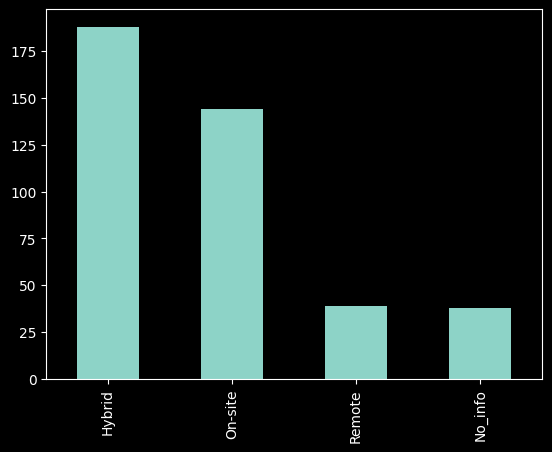

In [ ]:
df['type_of_employment'].value_counts().plot(kind='bar');

## company

In [ ]:
df['company'].nunique()

279

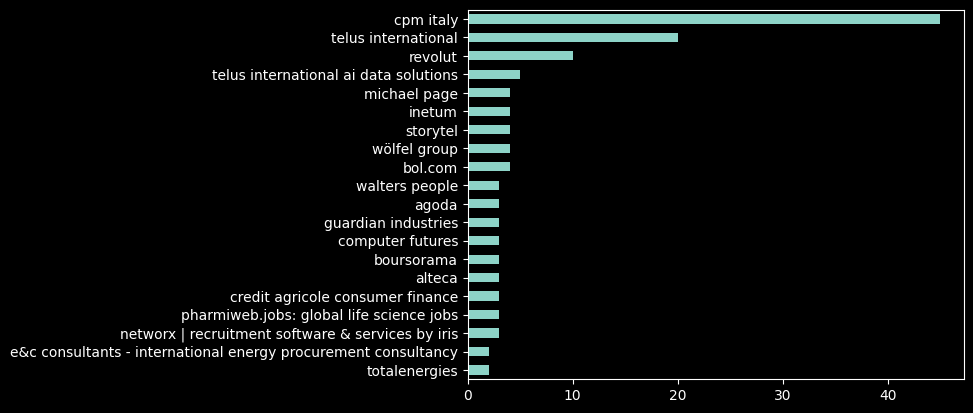

In [ ]:
df['company'].value_counts().head(20).sort_values().plot(kind='barh');

## field_of_activity

In [ ]:
df['field_of_activity'].nunique()

56

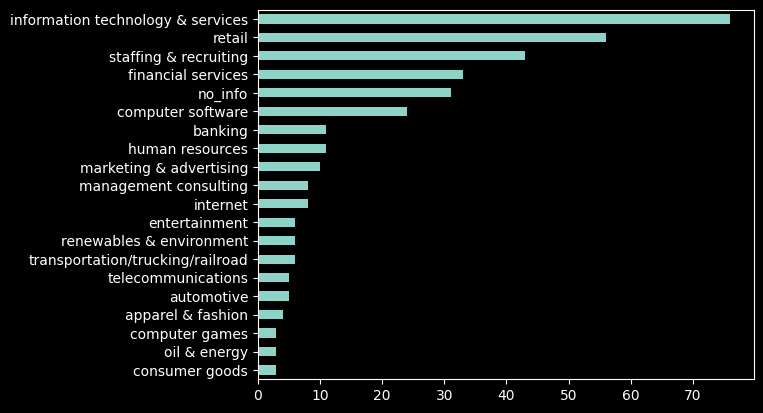

In [ ]:
df['field_of_activity'].value_counts().head(20).sort_values().plot(kind='barh');

## company_size

In [ ]:
def comp_size (df):
  if df['company_size']=='10001+':
    return 'big_company (10001+)'

  if df['company_size']=='No_info':
    return 'No_info'

  if df['company_size']=='1001-5000' or df['company_size']=='5001-10000' :
    return 'medium_company (1001-10000)'

  else:
     return 'small company (0-1000)'

In [ ]:
df['company_size']=df.apply(comp_size, axis=1)

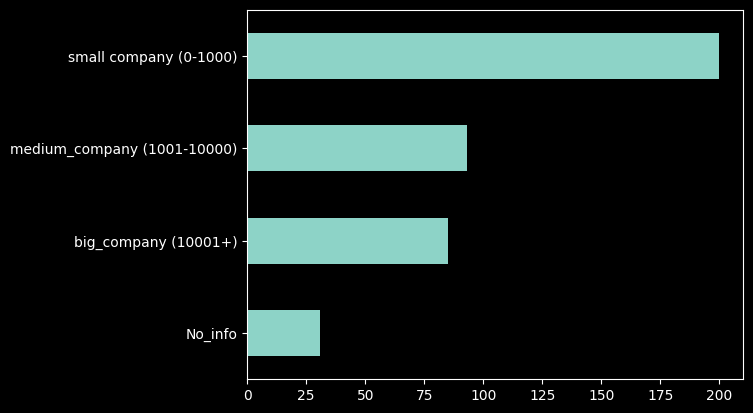

In [ ]:
df['company_size'].value_counts().sort_values().plot(kind='barh');

## hard_skills

In [ ]:
df['hard_skills'].value_counts()

excel                                                                            62
No_info                                                                          44
python, scala, sql, java, c++                                                     8
excel, ssis                                                                       7
excel, sql                                                                        6
                                                                                 ..
excel, sql, java, html, power bi                                                  1
excel, salesforce                                                                 1
talend, informatica, oracle data integrator, datastage, python, sql, java         1
google analytics, adobe analytics, asana, python,  r , sql, tableau, power bi     1
ssis, datastage                                                                   1
Name: hard_skills, Length: 224, dtype: int64

## publication

In [ ]:
date = datetime.strptime('2023-05-23', '%Y-%m-%d')

In [ ]:
def publication_date (df):
  if df['publication']=='1 week ago':
    return date-timedelta(days=7)

  if df['publication']=='2 weeks ago':
    return date-timedelta(days=14)

  if df['publication']=='3 weeks ago':
    return date-timedelta(days=21)

  if df['publication']=='4 weeks ago':
    return date-timedelta(days=28)

  if df['publication']=='1 day ago':
    return date-timedelta(days=1)

  if df['publication']=='2 days ago':
    return date-timedelta(days=2)

  if df['publication']=='3 days ago':
    return date-timedelta(days=3)

  if df['publication']=='4 days ago':
    return date-timedelta(days=4)

  if df['publication']=='5 days ago':
    return date-timedelta(days=5)

  if df['publication']=='6 days ago':
    return date-timedelta(days=6)

  else:
     return date

In [ ]:
df['publication']=df.apply(publication_date, axis=1)

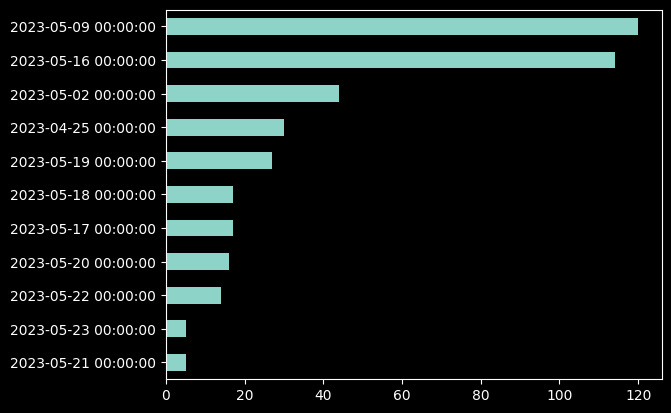

In [ ]:
df['publication'].value_counts().sort_values().plot(kind='barh');

In [ ]:
df.query('publication=="2023-05-16"')['candidates'].sum()

5982

## candidates

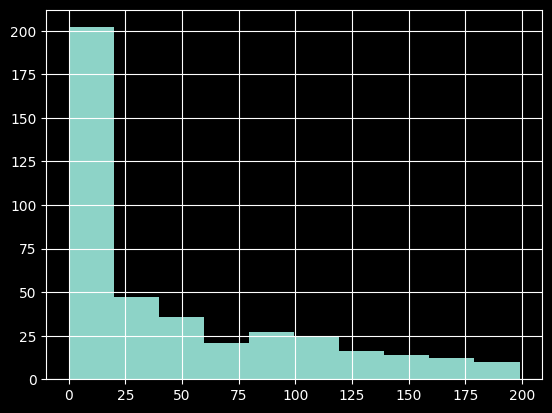

In [ ]:
df['candidates'].hist();

## city

In [ ]:
df['city'].nunique()

224

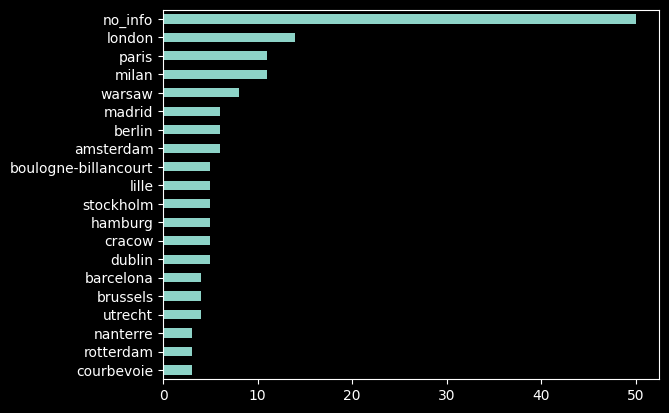

In [ ]:
df['city'].value_counts().head(20).sort_values().plot(kind='barh');

## country

In [ ]:
df['country']=df['country'].str.strip()

In [ ]:
country={'germany': ['berlin', 'hamburg', 'bremen','berlin metropolitan area','greater nuremberg metropolitan area', 'cologne bonn region'] ,
      'france' : ['greater paris metropolitan region','greater pau area', 'île-de-france'],
     'belgium' :['brussels metropolitan area','flemish region', 'brussels region'] ,
      'spain': ['greater barcelona metropolitan area'],
     'poland':['krakow metropolitan area', 'wroclaw metropolitan area'] ,'slovakia' : ['greater banska bystrica area'],
     'sweden':['jonkoping county', 'stockholm county'] ,'ireland':['greater munster area', 'county dublin'] ,
    'united kingdom' :['manchester area'], 'netherlands': ['eindhoven area', 'rotterdam and the hague', 'north holland'] ,
    'hungary': ['budapest'], 'czechia':['moravia-silesia']}

In [ ]:
for k in country:
  for i in country[k]:
   #   print(i,k)
      df['country']= df['country'].replace(i,k)

In [ ]:
df['country'].nunique()

27

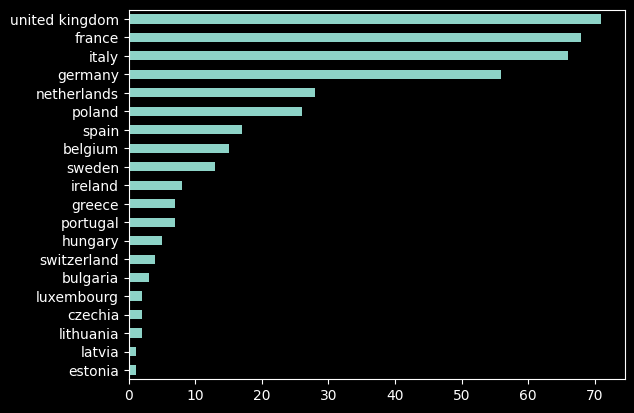

In [ ]:
df['country'].value_counts().head(20).sort_values().plot(kind='barh');

In [ ]:
df.head()

,vacancy_name,type_of_employment,company,field_of_activity,company_size,hard_skills,publication,candidates,city,country
0,data analyst,On-site,pharmiweb.jobs: global life science jobs,staffing & recruiting,small company (0-1000),"excel, spss, sql, sas",2023-05-16,47,basel,switzerland
1,data analyst - logistics,On-site,resolute recruitment,no_info,No_info,No_info,2023-05-16,0,coventry,united kingdom
2,data analyst - logistics,On-site,resolute recruitment,no_info,No_info,ssis,2023-05-16,0,coventry,united kingdom
3,data analyst (space & planning),On-site,mole valley farmers,no_info,No_info,"excel, ssis",2023-05-16,0,south molton,united kingdom
4,data analyst,On-site,forfirm,no_info,No_info,"aws, gcp, oracle data integrator, python, sql,...",2023-05-09,0,lugano,switzerland


# Экспорт данных

In [ ]:
df_hard_skills = df[['type_of_employment','country', 'hard_skills']]

In [ ]:
df_hard_skills['hard_skills']=df_hard_skills['hard_skills'].str.split(', ')

<ipython-input-52-9251d949ed11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hard_skills['hard_skills']=df_hard_skills['hard_skills'].str.split(', ')


In [ ]:
df_hard_skills = df_hard_skills.explode('hard_skills')

In [ ]:
df=df.drop('hard_skills', axis=1)

In [ ]:
df.head()

,vacancy_name,type_of_employment,company,field_of_activity,company_size,publication,candidates,city,country
0,data analyst,On-site,pharmiweb.jobs: global life science jobs,staffing & recruiting,small company (0-1000),2023-05-16,47,basel,switzerland
1,data analyst - logistics,On-site,resolute recruitment,no_info,No_info,2023-05-16,0,coventry,united kingdom
2,data analyst - logistics,On-site,resolute recruitment,no_info,No_info,2023-05-16,0,coventry,united kingdom
3,data analyst (space & planning),On-site,mole valley farmers,no_info,No_info,2023-05-16,0,south molton,united kingdom
4,data analyst,On-site,forfirm,no_info,No_info,2023-05-09,0,lugano,switzerland


In [ ]:
df_hard_skills

,type_of_employment,country,hard_skills
0,On-site,switzerland,excel
0,On-site,switzerland,spss
0,On-site,switzerland,sql
0,On-site,switzerland,sas
1,On-site,united kingdom,No_info
...,...,...,...
976,Hybrid,france,sas
982,Hybrid,italy,excel
988,On-site,italy,ssis
988,On-site,italy,datastage


In [ ]:
df_hard_skills['hard_skills']=df_hard_skills['hard_skills'].str.join('')

In [ ]:
df_hard_skills['hard_skills']= df_hard_skills['hard_skills'].replace('powerbi', 'power bi')

In [ ]:
df_hard_skills['hard_skills'].value_counts()

excel                   213
sql                     195
python                  143
power bi                134
tableau                 105
                       ... 
sisense                   1
thoughtspot               1
redshift                  1
miro                      1
sap business objects      1
Name: hard_skills, Length: 61, dtype: int64

In [ ]:
df_hard_skills['hard_skills'].nunique()

61

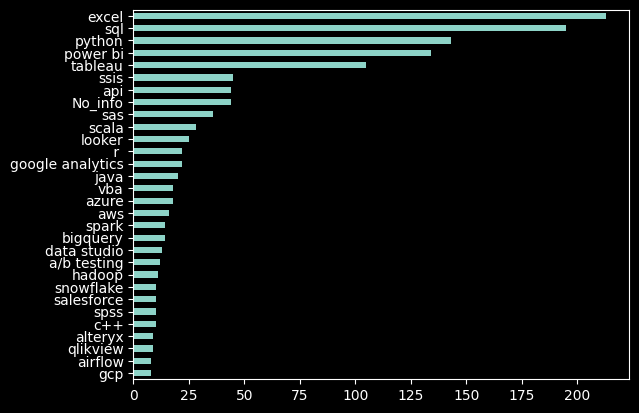

In [ ]:
df_hard_skills['hard_skills'].value_counts().head(30).sort_values().plot(kind='barh');

In [ ]:
df.to_excel('/content/drive/MyDrive/Linkedin- Мастерская/data.xlsx' , index=False)
df_hard_skills.to_excel('/content/drive/MyDrive/Linkedin- Мастерская/hard_skills_2.xlsx',  index=False)